###### Travel Review Ratings Dataset Analysis
###### Submitted By: Iswarya Nagappan

###### Import the necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
os.getcwd()
os.chdir("../input")

In [3]:
input_data = pd.read_csv(r'google_review_ratings.csv')

In [4]:
input_data.shape

(5456, 26)

###### Looking at the summary of the dataset

In [5]:
input_data.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')

In [6]:
input_data.head(5)

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


###### Data Cleaning and Preprocessing

In [7]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
User           5456 non-null object
Category 1     5456 non-null float64
Category 2     5456 non-null float64
Category 3     5456 non-null float64
Category 4     5456 non-null float64
Category 5     5456 non-null float64
Category 6     5456 non-null float64
Category 7     5456 non-null float64
Category 8     5456 non-null float64
Category 9     5456 non-null float64
Category 10    5456 non-null float64
Category 11    5456 non-null object
Category 12    5455 non-null float64
Category 13    5456 non-null float64
Category 14    5456 non-null float64
Category 15    5456 non-null float64
Category 16    5456 non-null float64
Category 17    5456 non-null float64
Category 18    5456 non-null float64
Category 19    5456 non-null float64
Category 20    5456 non-null float64
Category 21    5456 non-null float64
Category 22    5456 non-null float64
Category 23    5456 non-null float64
Categor

There are only 2 non null values in the last column. There are only 24 categories described in the dataset description and the last column is not present there. So let's drop the column

In [8]:
input_data.drop('Unnamed: 25', axis = 1, inplace = True)

Renaming the columns for ease of understanding

In [9]:
column_names = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']
input_data.columns = column_names

In [10]:
input_data[column_names].isnull().sum()

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       1
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64

There are two columns with one null value each. Let us impute the null values with 0 considering that the user didn't give rating to these categories

In [11]:
input_data = input_data.fillna(0)

In [12]:
input_data.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

Converting the column 'local services' to float datatype

There is a string present among the rows. Let's check how many rows have such values and convert them to float

In [13]:
input_data['local_services'][input_data['local_services'] == '2\t2.']

2712    2\t2.
Name: local_services, dtype: object

There is only one row with that value. Let us replace that value with the mean of the rest of the rows

In [14]:
local_services_mean = input_data['local_services'][input_data['local_services'] != '2\t2.']
input_data['local_services'][input_data['local_services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))
input_data['local_services'] = input_data['local_services'].astype('float64')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
input_data.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

###### Exploratory Data Analysis

In [16]:
input_data[column_names[:12]].describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.550071
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381643
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [17]:
input_data[column_names[12:]].describe()

,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.077958,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,1.249411,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [18]:
input_data_description = input_data.describe()
min_val = input_data_description.loc['min'] > 0
min_val[min_val]

parks                    True
theatres                 True
museums                  True
malls                    True
zoo                      True
restaurants              True
pubs_bars                True
local_services           True
hotels_other_lodgings    True
juice_bars               True
Name: min, dtype: bool

The above 10 categories have been given a rating by all the users as the minimum value is greater than 0

Text(0.5, 1.0, 'No of reviews under each category')

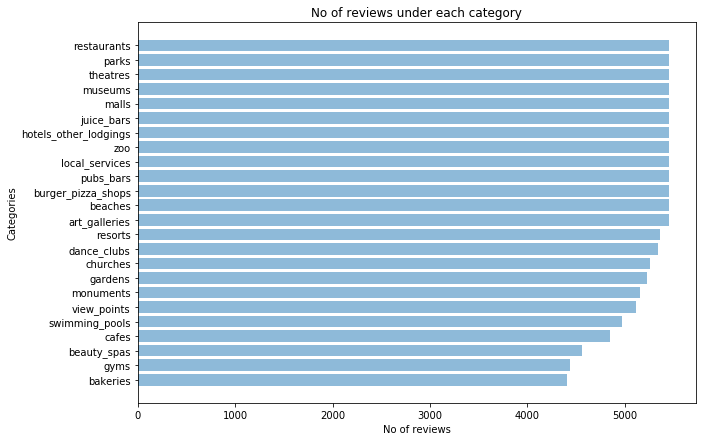

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcdefaults()
%matplotlib inline
no_of_zeros = input_data[column_names[1:]].astype(bool).sum(axis=0).sort_values()

plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), no_of_zeros.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), no_of_zeros.index)
plt.xlabel('No of reviews')
plt.ylabel('Categories')
plt.title('No of reviews under each category')

Let us look at how many users have given rating for each category

No of users given rating to bakeries and gyms are the least

Let us have a look at the summary of ratings given by users for various categories

In [20]:
no_of_reviews = input_data[column_names[1:]].astype(bool).sum(axis=1).value_counts()

Text(0.5, 1.0, 'No of Categories vs No of reviews')

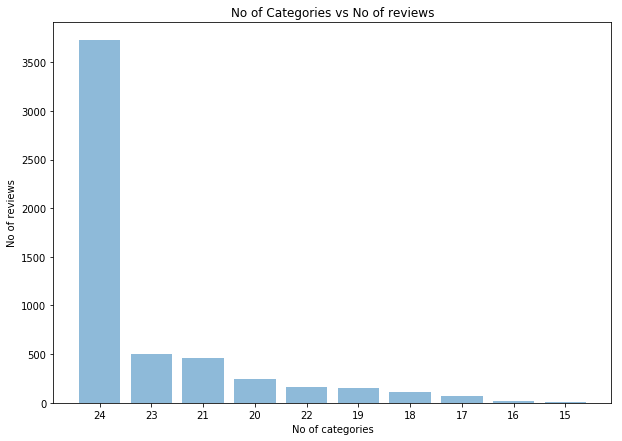

In [21]:
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')

Around 3500 users have given a rating for all the 24 categories and the least no of rating given by a user is 15. So for users with lesser number of ratings a recommender system can be built

In [22]:
avg_rating = input_data[column_names[1:]].mean()
avg_rating = avg_rating.sort_values()

Text(0.5, 1.0, 'Average rating per Category')

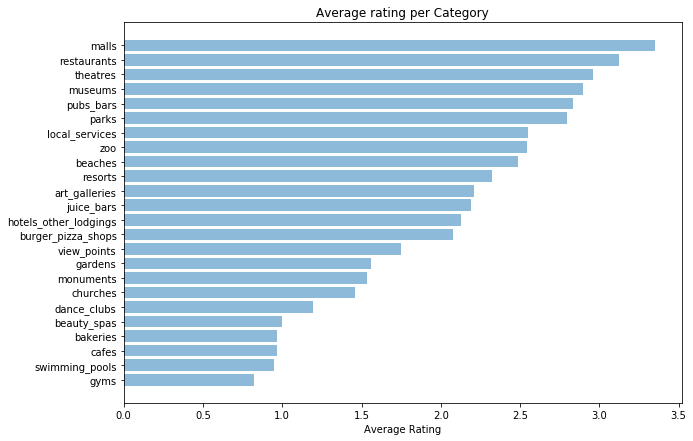

In [23]:
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), avg_rating.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')

Malls have the highest average rating and gyms have the lowest average rating implying that travellers prefer malls and least preferres is gym. We can even relate this to the common phenomena that gyms are not usually visited by tourists

Let us basket the different categories into higher levels and do an analysis to see if there is any influence of the type of the tourist attraction

In [24]:
entertainment = ['theatres', 'dance_clubs', 'malls']
food_travel = ['restaurants', 'pubs_bars', 'burger_pizza_shops', 'juice_bars', 'bakeries', 'cafes']
places_of_stay = ['hotels_other_lodgings', 'resorts']
historical = ['churches', 'museums', 'art_galleries', 'monuments']
nature = ['beaches', 'parks', 'zoo', 'view_points', 'gardens']
services = ['local_services', 'swimming_pools', 'gyms', 'beauty_spas']

In [25]:
df_category_reviews = pd.DataFrame(columns = ['entertainment', 'food_travel', 'places_of_stay', 'historical', 'nature', 'services'])

In [26]:
df_category_reviews['entertainment'] = input_data[entertainment].mean(axis = 1)
df_category_reviews['food_travel'] = input_data[food_travel].mean(axis = 1)
df_category_reviews['places_of_stay'] = input_data[places_of_stay].mean(axis = 1)
df_category_reviews['historical'] = input_data[historical].mean(axis = 1)
df_category_reviews['nature'] = input_data[nature].mean(axis = 1)
df_category_reviews['services'] = input_data[services].mean(axis = 1)

In [27]:
df_category_reviews.describe()

,entertainment,food_travel,places_of_stay,historical,nature,services
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.501045,2.027203,2.222609,2.021809,2.227604,1.330440
std,0.722411,0.549360,0.886588,0.584988,0.662531,0.580788
min,1.120000,0.721667,0.730000,0.557500,0.576000,0.205000
25%,1.963333,1.650000,1.470000,1.647500,1.762000,0.937500
50%,2.453333,2.027500,1.885000,1.977500,2.160000,1.245000
75%,2.916667,2.433750,3.160000,2.392500,2.656000,1.685000
max,5.000000,3.873333,5.000000,4.322500,4.520000,3.937500


Entertainment has the highest average rating and Services have the lowest rating implying that people are more interested in entertainment

###### Recommender Engines

Let's try to build different types of recommendation engines with the given dataset

###### Approach 1: Popularity Based Recommendation Engine

In [28]:
ratings_per_category_df = pd.DataFrame(input_data[column_names[1:]].mean()).reset_index(level=0)

In [29]:
ratings_per_category_df.columns = ['category', 'avg_rating']

In [30]:
ratings_per_category_df['no_of_ratings'] = input_data[column_names[1:]].astype(bool).sum(axis=0).values.tolist()

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ratings_per_category_df['avg_rating_scaled'] = scaler.fit_transform(ratings_per_category_df['avg_rating'].values.reshape(-1,1))
ratings_per_category_df['no_of_ratings_scaled'] = scaler.fit_transform(ratings_per_category_df['no_of_ratings'].values.reshape(-1,1))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
def calculate_weighted_rating(x):
    return (0.5 * x['avg_rating_scaled'] + 0.5 * x['no_of_ratings_scaled'])

ratings_per_category_df['weighted_rating'] = ratings_per_category_df.apply(calculate_weighted_rating, axis = 1)
ratings_per_category_df = ratings_per_category_df.sort_values(by=['weighted_rating'], ascending = False)

In [33]:
input_data.head()

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [34]:
def get_recommendation_based_on_popularity(x):
    zero_cols = input_data[input_data['user_id'] == x['user_id']][column_names[1:]].astype(bool).sum(axis=0)
    zero_df = pd.DataFrame(zero_cols[zero_cols == 0]).reset_index(level = 0)
    zero_df.columns = ['category', 'rating']
    zero_df = pd.merge(zero_df, ratings_per_category_df, on = 'category', how = 'left')[['category', 'weighted_rating']]
    zero_df = zero_df.sort_values(by = ['weighted_rating'], ascending = False)
    if len(zero_df) > 0:
        return zero_df['category'].values[0]
    else:
        return ""

In [35]:
input_data_recommendation = input_data.copy()
input_data_recommendation['recommendation_based_on_popularity'] = input_data_recommendation.apply(get_recommendation_based_on_popularity, axis = 1)

In [63]:
input_data_recommendation['recommendation_based_on_popularity'][input_data['user_id'] == "User 16"]

15    gardens
Name: recommendation_based_on_popularity, dtype: object

###### Collaborative Filtering based recommender

###### Approach 2: Recommender based on kNN

In [37]:
from sklearn.neighbors import NearestNeighbors

In [38]:
input_data_matrix = input_data[column_names[1:]].values
knn_model = NearestNeighbors(n_neighbors=5).fit(input_data_matrix)

In [39]:
query_index = np.random.choice(input_data[column_names[1:]].shape[0])
distances, indices = knn_model.kneighbors(input_data[column_names[1:]].iloc[query_index, :].values.reshape(1,-1), n_neighbors = 5)

In [62]:
def compare_df(index, ind):        
    zero_cols_in = input_data.loc[index].astype(bool)
    zero_df_in = pd.DataFrame(zero_cols_in[zero_cols_in == True]).reset_index(level = 0)
    in_wo_rating = zero_df_in['index']
    sug_user = input_data.loc[ind]
    zero_cols_sug = sug_user.astype(bool)
    zero_df_sug = pd.DataFrame(zero_cols_sug[zero_cols_sug == True]).reset_index(level = 0)
    sug_wo_rating = zero_df_sug['index']
    sugg_list = list(set(sug_wo_rating) - set(in_wo_rating))
    return sugg_list
def recommend_knn(index):
    distances, indices = knn_model.kneighbors(input_data[column_names[1:]].iloc[index, :].values.reshape(1,-1), n_neighbors = 10)
    distances = np.sort(distances)
    for i in range(0,len(indices[0])):
        ind = np.where(distances.flatten() == distances[0][i])[0][0]
        sug_list = compare_df(index, indices[0][i]) 
        if len(sug_list) > 0:
            break
    return sug_list
print(recommend_knn(16))                                              

['swimming_pools']


###### Approach 3: Recommender Based on Matrix Factorization

In [41]:
input_data_matrix = input_data.set_index('user_id').as_matrix()
user_ratings_mean = np.mean(input_data_matrix, axis = 1)
user_ratings_demeaned = input_data_matrix - user_ratings_mean.reshape(-1, 1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [42]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(user_ratings_demeaned, k = 1)

In [43]:
sigma = np.diag(sigma)

In [44]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [45]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = column_names[1:])
preds_df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,0.574753,1.910474,2.174712,2.686375,3.039585,3.137485,3.924062,2.709296,3.566258,3.141066,2.598059,1.766469,1.791675,1.808781,1.765547,0.296633,-0.133864,-0.334549,-0.278153,-0.167969,-0.128756,0.683061,0.528970,0.600029
1,0.579082,1.925779,2.192187,2.708055,3.064167,3.162872,3.955912,2.731164,3.595167,3.166482,2.619013,1.780590,1.806003,1.823250,1.779661,0.298677,-0.135358,-0.337692,-0.280832,-0.169742,-0.130207,0.688281,0.532923,0.604566
2,0.578730,1.924221,2.190390,2.705796,3.061589,3.160206,3.952535,2.728884,3.592114,3.163813,2.616834,1.779162,1.804552,1.821784,1.778234,0.298576,-0.135070,-0.337223,-0.280414,-0.169424,-0.129924,0.687831,0.532612,0.604191
3,0.591776,1.933175,2.198536,2.712374,3.067085,3.165402,3.955322,2.735392,3.595997,3.168998,2.623683,1.788558,1.813871,1.831050,1.787632,0.312474,-0.119853,-0.321391,-0.264755,-0.154103,-0.114723,0.700545,0.545799,0.617160
4,0.578730,1.924221,2.190390,2.705796,3.061589,3.160206,3.952535,2.728884,3.592114,3.163813,2.616834,1.779162,1.804552,1.821784,1.778234,0.298576,-0.135070,-0.337223,-0.280414,-0.169424,-0.129924,0.687831,0.532612,0.604191


In [61]:
def recommend_svd(index):
    zero_cols_in = input_data.loc[index].astype(bool)
    zero_df_in = pd.DataFrame(zero_cols_in[zero_cols_in == False]).reset_index(level = 0)
    in_wo_rating = zero_df_in['index']
    sug_user = preds_df[in_wo_rating.values.tolist()[1:]].loc[index]
    sug_list = sug_user.sort_values(ascending = False).index[0]
    return sug_list
print(recommend_svd(16))

view_points


###### Approach 4: Clustering the data for user segmentation

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
input_array = scaler.fit_transform(input_data[column_names[1:]].values)
ratings_per_category_df['no_of_ratings_scaled'] = scaler.fit_transform(ratings_per_category_df['no_of_ratings'].values.reshape(-1,1))
#nput_array = input_data[column_names[1:]].values
kmeans = KMeans(n_clusters=6)
# fit kmeans object to data
kmeans.fit(input_array)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(input_array)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


[[0.32340462 0.43875434 0.62447688 0.84797826 0.78053677 0.54427018
  0.4105536  0.31891388 0.43325158 0.45646806 0.44626811 0.32226879
  0.24275065 0.10384516 0.23284104 0.24276012 0.1748237  0.13318208
  0.12327457 0.19043064 0.21099422 0.959      0.50152601 0.35475145]
 [0.15197246 0.20699484 0.32760069 0.18422302 0.12623986 0.13235756
  0.46975531 0.26577532 0.45650735 0.49319131 0.56362213 0.80342857
  0.82366752 0.96528026 0.79328055 0.27825818 0.22533219 0.19577969
  0.2416833  0.20089157 0.14088812 0.13839243 0.133821   0.15287435]
 [0.23713718 0.3852148  0.35541155 0.30164966 0.27743636 0.39586369
  0.72271484 0.67688659 0.91023978 0.89364828 0.71717753 0.40600181
  0.2355553  0.13782695 0.40334838 0.21065704 0.13022022 0.08520578
  0.08843141 0.10416426 0.12985921 0.23793141 0.2142148  0.22969675]
 [0.4627566  0.55108895 0.51428543 0.3451784  0.24720853 0.20633904
  0.22101964 0.17275136 0.24613223 0.17974417 0.18294396 0.28459629
  0.17827093 0.25015447 0.46907527 0.31949169

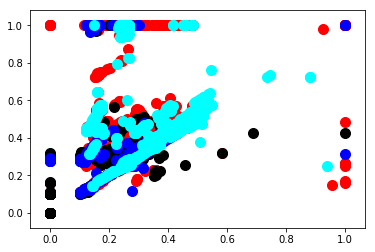

In [48]:
plt.scatter(input_array[y_km ==0,0], input_array[y_km == 0,1], s=100, c='red')
plt.scatter(input_array[y_km ==1,0], input_array[y_km == 1,1], s=100, c='black')
plt.scatter(input_array[y_km ==2,0], input_array[y_km == 2,1], s=100, c='blue')
plt.scatter(input_array[y_km ==3,0], input_array[y_km == 3,1], s=100, c='cyan')

Find optimum k

In [49]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(input_array)
    Sum_of_squared_distances.append(km.inertia_)

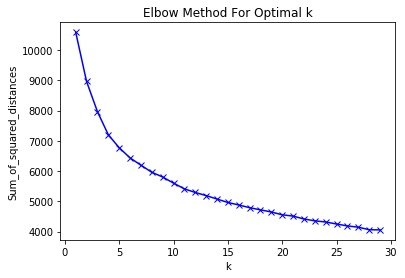

In [50]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,30):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(input_array)
    centers = clusterer.cluster_centers_

    score = silhouette_score (input_array, preds)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.14889297032894283)
For n_clusters = 3, silhouette score is 0.15416313592354774)
For n_clusters = 4, silhouette score is 0.16191464594332283)
For n_clusters = 5, silhouette score is 0.15792666250545892)
For n_clusters = 6, silhouette score is 0.1564663387879014)
For n_clusters = 7, silhouette score is 0.15344232856279885)
For n_clusters = 8, silhouette score is 0.1638232738389802)
For n_clusters = 9, silhouette score is 0.16185716092014502)
For n_clusters = 10, silhouette score is 0.15070717130171088)
For n_clusters = 11, silhouette score is 0.15701946035845785)
For n_clusters = 12, silhouette score is 0.15286909500548973)
For n_clusters = 13, silhouette score is 0.15558482149918068)
For n_clusters = 14, silhouette score is 0.15857874929016585)
For n_clusters = 15, silhouette score is 0.15430557668971417)
For n_clusters = 16, silhouette score is 0.14944122458566475)
For n_clusters = 17, silhouette score is 0.1560386628385294)
For n_clusters = 18

There is no elbow formed in the plot and silhoutte score is also low showing that there are no specific clusters in the dataset. All the rows may belong to a single cluster

###### Approach 5: Recommender based on Surprise python package to calculate evaluation metrics

In [52]:
from surprise import SVD, NormalPredictor, KNNBasic, KNNWithMeans, KNNWithZScore, CoClustering
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [53]:
reader = Reader(rating_scale=(0, 5))
df = input_data.replace(0, np.nan).set_index('user_id', append=True).stack().reset_index().rename(columns={0:'rating', 'level_2':'itemID', 'user_id':'userID'}).drop('level_0',1)
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [54]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), NormalPredictor(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
bench_mark_df = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [55]:
bench_mark_df = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

In [56]:
bench_mark_df

,test_rmse,fit_time,test_time
Algorithm,,,
KNNBasic,0.910686,20.581597,98.734089
KNNWithMeans,0.956877,20.592867,110.221666
KNNWithZScore,0.983158,21.467469,110.264381
SVD,1.133019,5.389760,0.404276
CoClustering,1.414779,1.575604,0.390239
NormalPredictor,1.981981,0.131237,0.286050


kNNBasic has given the lowest rmse. So let's predict with the same

In [59]:
from surprise.model_selection import train_test_split
from surprise import accuracy
trainset, testset = train_test_split(data, test_size=0.25, random_state = 12)
algo = KNNBasic()
algo = algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9006


0.9006350698355876

In [60]:
from collections import defaultdict
def get_top_n(predictions, n=5):
   
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

User 111 ['pubs_bars', 'local_services', 'resorts', 'gardens', 'churches', 'view_points', 'cafes']
User 42 ['malls', 'parks', 'beaches', 'pubs_bars', 'view_points', 'burger_pizza_shops', 'monuments']
User 2597 ['malls', 'parks', 'beaches', 'beauty_spas', 'hotels_other_lodgings', 'swimming_pools', 'churches', 'dance_clubs']
User 2974 ['beaches', 'beauty_spas', 'swimming_pools']
User 2830 ['museums', 'gardens', 'malls', 'churches', 'juice_bars', 'gyms']
User 351 ['malls', 'local_services', 'art_galleries', 'bakeries', 'cafes']
User 280 ['local_services', 'restaurants', 'zoo', 'juice_bars', 'museums', 'art_galleries', 'view_points', 'gardens', 'churches']
User 1722 ['gyms', 'resorts', 'juice_bars', 'beauty_spas', 'burger_pizza_shops']
User 1406 ['local_services', 'restaurants', 'pubs_bars', 'museums', 'theatres', 'juice_bars', 'beaches', 'monuments']
User 3111 ['malls', 'local_services', 'resorts', 'monuments', 'gardens', 'churches', 'bakeries', 'cafes']
User 1000 ['malls', 'juice_bars', 

User 5348 ['monuments', 'gardens', 'juice_bars', 'burger_pizza_shops']
User 3885 ['pubs_bars', 'malls', 'beaches', 'zoo', 'art_galleries', 'dance_clubs', 'gyms', 'bakeries']
User 822 ['art_galleries', 'beauty_spas', 'parks', 'theatres', 'gyms', 'bakeries', 'pubs_bars', 'restaurants', 'burger_pizza_shops', 'swimming_pools']
User 484 ['museums', 'malls', 'resorts', 'local_services', 'zoo', 'gardens', 'juice_bars', 'dance_clubs']
User 1209 ['theatres', 'zoo', 'resorts', 'gardens', 'swimming_pools', 'beauty_spas', 'gyms']
User 4267 ['pubs_bars', 'parks', 'beaches', 'art_galleries', 'churches', 'swimming_pools']
User 2670 ['resorts', 'view_points', 'gyms', 'parks', 'beauty_spas']
User 2280 ['zoo', 'resorts', 'art_galleries', 'local_services', 'juice_bars', 'hotels_other_lodgings']
User 4048 ['theatres', 'beaches', 'malls', 'juice_bars', 'churches']
User 4860 ['parks', 'restaurants', 'local_services', 'cafes']
User 709 ['juice_bars', 'art_galleries', 'hotels_other_lodgings', 'pubs_bars', 'mu

User 3864 ['pubs_bars', 'zoo', 'hotels_other_lodgings', 'art_galleries', 'gyms']
User 897 ['restaurants', 'beauty_spas', 'bakeries', 'pubs_bars', 'local_services', 'cafes']
User 4813 ['local_services', 'restaurants', 'zoo', 'gardens', 'dance_clubs', 'swimming_pools', 'gyms']
User 4954 ['beaches', 'resorts', 'restaurants', 'swimming_pools']
User 5290 ['art_galleries', 'dance_clubs', 'bakeries', 'burger_pizza_shops', 'theatres', 'resorts', 'monuments']
User 1193 ['theatres', 'malls', 'pubs_bars', 'zoo', 'local_services', 'burger_pizza_shops', 'monuments', 'beaches', 'art_galleries']
User 2677 ['gardens', 'view_points', 'gyms', 'museums', 'parks', 'malls', 'juice_bars', 'swimming_pools']
User 4140 ['beaches', 'pubs_bars', 'burger_pizza_shops', 'dance_clubs', 'swimming_pools', 'beauty_spas', 'gyms']
User 829 ['gardens', 'local_services', 'theatres', 'pubs_bars', 'museums', 'malls']
User 4242 ['malls', 'restaurants', 'museums', 'beaches', 'resorts', 'juice_bars', 'hotels_other_lodgings', 'm

User 1162 ['parks', 'museums', 'theatres']
User 2961 ['malls', 'art_galleries', 'view_points', 'monuments', 'dance_clubs', 'swimming_pools']
User 3742 ['pubs_bars', 'malls', 'local_services', 'burger_pizza_shops', 'beaches', 'resorts', 'gyms', 'swimming_pools', 'cafes', 'beauty_spas']
User 4225 ['art_galleries', 'theatres', 'zoo', 'juice_bars', 'hotels_other_lodgings', 'pubs_bars', 'gyms']
User 3297 ['view_points', 'burger_pizza_shops', 'pubs_bars', 'local_services', 'hotels_other_lodgings', 'beaches', 'restaurants', 'churches', 'swimming_pools']
User 860 ['monuments', 'gardens', 'beaches', 'churches', 'cafes', 'bakeries', 'swimming_pools', 'burger_pizza_shops']
User 384 ['art_galleries', 'hotels_other_lodgings', 'burger_pizza_shops', 'beaches', 'parks', 'beauty_spas', 'monuments', 'view_points']
User 1316 ['pubs_bars', 'restaurants', 'dance_clubs', 'monuments', 'gardens']
User 821 ['view_points', 'gardens', 'beauty_spas', 'museums', 'zoo']
User 1340 ['parks', 'local_services', 'zoo', 

User 406 ['art_galleries', 'resorts', 'museums', 'parks', 'burger_pizza_shops', 'churches', 'gardens']
User 5062 ['local_services', 'malls', 'hotels_other_lodgings', 'cafes', 'gyms', 'bakeries']
User 5297 ['resorts', 'juice_bars', 'museums', 'churches', 'gardens', 'monuments', 'pubs_bars', 'hotels_other_lodgings', 'local_services', 'view_points']
User 3482 ['burger_pizza_shops', 'museums', 'gyms', 'swimming_pools', 'gardens', 'view_points', 'monuments']
User 5007 ['malls', 'beaches', 'burger_pizza_shops', 'view_points', 'hotels_other_lodgings', 'dance_clubs', 'monuments']
User 2073 ['parks', 'theatres', 'restaurants', 'juice_bars', 'pubs_bars', 'view_points', 'beaches', 'monuments', 'gardens', 'burger_pizza_shops']
User 1670 ['art_galleries', 'swimming_pools', 'bakeries', 'gyms', 'pubs_bars', 'view_points']
User 4562 ['restaurants', 'beaches', 'gyms', 'cafes']
User 4757 ['zoo', 'view_points', 'hotels_other_lodgings', 'gardens', 'swimming_pools']
User 5109 ['theatres', 'burger_pizza_sho

User 2138 ['resorts', 'juice_bars', 'cafes', 'bakeries', 'beauty_spas']
User 2016 ['restaurants', 'theatres', 'museums', 'parks', 'hotels_other_lodgings', 'view_points', 'gardens', 'churches']
User 4412 ['gyms', 'juice_bars', 'museums', 'resorts']
User 1444 ['view_points', 'restaurants', 'zoo']
User 4602 ['monuments', 'juice_bars', 'cafes', 'swimming_pools', 'gyms']
User 2455 ['restaurants', 'malls', 'parks', 'local_services', 'beaches', 'gardens', 'dance_clubs']
User 5319 ['view_points', 'gyms', 'monuments', 'beauty_spas', 'art_galleries', 'restaurants']
User 3209 ['theatres', 'zoo', 'churches', 'gyms', 'beauty_spas']
User 3168 ['juice_bars', 'restaurants', 'parks', 'art_galleries', 'gardens', 'monuments', 'cafes', 'view_points', 'swimming_pools']
User 5427 ['theatres', 'beaches', 'hotels_other_lodgings', 'burger_pizza_shops']
User 2279 ['museums', 'art_galleries', 'burger_pizza_shops', 'dance_clubs']
User 2518 ['juice_bars', 'art_galleries', 'museums', 'beaches', 'dance_clubs', 'view

User 1236 ['parks', 'beaches', 'juice_bars', 'restaurants', 'hotels_other_lodgings', 'churches', 'monuments', 'beauty_spas', 'dance_clubs', 'gyms']
User 232 ['local_services', 'beaches', 'gardens', 'churches']
User 4325 ['beaches', 'museums', 'dance_clubs', 'swimming_pools']
User 2291 ['restaurants', 'local_services', 'zoo', 'hotels_other_lodgings', 'gardens', 'monuments']
User 1516 ['museums', 'hotels_other_lodgings', 'churches', 'dance_clubs', 'gyms']
User 2546 ['malls', 'restaurants', 'churches', 'gardens']
User 3062 ['zoo', 'museums', 'beaches', 'gardens', 'cafes', 'gyms']
User 1540 ['pubs_bars', 'zoo', 'malls', 'theatres', 'swimming_pools']
User 4469 ['churches', 'beaches', 'dance_clubs', 'beauty_spas', 'local_services', 'malls', 'burger_pizza_shops']
User 196 ['restaurants', 'pubs_bars', 'malls', 'zoo', 'theatres', 'parks']
User 1024 ['pubs_bars', 'juice_bars', 'churches', 'beauty_spas', 'bakeries', 'swimming_pools']
User 1549 ['local_services', 'art_galleries', 'dance_clubs', 'c

User 261 ['resorts', 'bakeries', 'beauty_spas']
User 3982 ['hotels_other_lodgings', 'beauty_spas', 'bakeries']
User 113 ['local_services', 'juice_bars', 'beaches', 'gardens', 'monuments']
User 4272 ['theatres', 'resorts']
User 512 ['museums', 'monuments', 'hotels_other_lodgings', 'burger_pizza_shops', 'juice_bars', 'swimming_pools', 'cafes', 'bakeries']
User 1519 ['museums', 'resorts', 'gyms']
User 1641 ['juice_bars', 'beaches', 'zoo', 'theatres', 'resorts']
User 46 ['parks', 'beaches', 'monuments', 'view_points', 'resorts', 'gardens', 'churches', 'cafes', 'swimming_pools']
User 1860 ['parks', 'museums', 'restaurants', 'malls', 'dance_clubs', 'hotels_other_lodgings', 'gyms']
User 731 ['dance_clubs', 'swimming_pools', 'churches', 'cafes', 'monuments', 'beauty_spas']
User 394 ['theatres', 'juice_bars', 'hotels_other_lodgings', 'gardens']
User 2385 ['malls', 'resorts', 'art_galleries', 'gyms']
User 2021 ['museums', 'beauty_spas']
User 465 ['resorts', 'dance_clubs', 'art_galleries', 'view_

User 4116 ['parks', 'churches', 'juice_bars', 'swimming_pools']
User 4752 ['local_services', 'pubs_bars', 'zoo', 'parks', 'burger_pizza_shops', 'juice_bars', 'art_galleries', 'monuments']
User 3005 ['malls', 'juice_bars', 'burger_pizza_shops', 'view_points', 'hotels_other_lodgings', 'gardens', 'cafes']
User 1292 ['theatres', 'malls', 'art_galleries', 'churches']
User 2811 ['beaches', 'museums', 'pubs_bars', 'gyms']
User 4692 ['beaches', 'theatres', 'beauty_spas', 'cafes', 'dance_clubs', 'gyms']
User 1225 ['burger_pizza_shops', 'local_services', 'museums', 'resorts', 'juice_bars', 'churches', 'art_galleries', 'beauty_spas']
User 728 ['art_galleries', 'hotels_other_lodgings', 'museums', 'churches', 'monuments', 'bakeries']
User 1787 ['beaches', 'theatres', 'juice_bars', 'pubs_bars', 'burger_pizza_shops', 'art_galleries', 'local_services', 'dance_clubs']
User 4394 ['swimming_pools', 'dance_clubs', 'art_galleries', 'restaurants', 'local_services', 'beaches', 'resorts', 'churches', 'monumen

User 663 ['pubs_bars', 'art_galleries', 'beaches']
User 4973 ['theatres', 'resorts', 'malls', 'art_galleries', 'view_points', 'dance_clubs', 'beauty_spas']
User 350 ['juice_bars', 'burger_pizza_shops', 'beaches']
User 5239 ['juice_bars', 'malls', 'zoo', 'parks', 'swimming_pools']
User 3697 ['parks', 'theatres', 'monuments', 'cafes', 'gardens', 'juice_bars']
User 2305 ['parks', 'restaurants', 'zoo', 'view_points', 'resorts', 'gardens', 'juice_bars', 'burger_pizza_shops']
User 435 ['burger_pizza_shops', 'view_points', 'juice_bars', 'monuments', 'bakeries']
User 4842 ['theatres', 'museums', 'restaurants', 'resorts', 'juice_bars', 'beauty_spas']
User 780 ['beauty_spas', 'theatres', 'juice_bars', 'dance_clubs']
User 4745 ['malls', 'resorts', 'art_galleries', 'view_points', 'monuments']
User 1737 ['view_points', 'gardens', 'beaches', 'burger_pizza_shops']
User 4569 ['beauty_spas', 'local_services', 'gardens']
User 3059 ['zoo', 'view_points', 'churches', 'dance_clubs', 'gyms']
User 4184 ['loc

User 4106 ['theatres', 'gardens', 'art_galleries']
User 4076 ['theatres', 'pubs_bars', 'zoo', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'resorts', 'dance_clubs']
User 127 ['restaurants', 'pubs_bars', 'theatres', 'burger_pizza_shops', 'churches']
User 1126 ['local_services', 'museums', 'juice_bars', 'beaches', 'monuments']
User 150 ['restaurants', 'malls', 'museums', 'theatres', 'bakeries', 'view_points']
User 246 ['malls', 'museums', 'monuments', 'swimming_pools']
User 5187 ['pubs_bars', 'restaurants', 'parks', 'art_galleries', 'dance_clubs']
User 5253 ['burger_pizza_shops', 'local_services', 'museums', 'gardens', 'dance_clubs']
User 226 ['local_services', 'restaurants', 'burger_pizza_shops', 'beaches', 'gyms']
User 1136 ['museums', 'monuments', 'bakeries', 'gardens', 'churches', 'gyms']
User 1291 ['restaurants', 'zoo', 'view_points', 'gyms']
User 2644 ['resorts', 'gardens', 'malls', 'beauty_spas', 'theatres', 'parks', 'dance_clubs']
User 2982 ['restaurants', 'pubs_b

User 1091 ['juice_bars']
User 4695 ['restaurants', 'zoo', 'resorts']
User 2476 ['pubs_bars', 'hotels_other_lodgings']
User 4289 ['museums']
User 139 ['beaches', 'gyms']
User 1853 ['beauty_spas', 'gardens', 'hotels_other_lodgings', 'bakeries']
User 4122 ['burger_pizza_shops', 'beauty_spas', 'bakeries', 'cafes']
User 376 ['hotels_other_lodgings', 'theatres']
User 256 ['malls', 'monuments', 'beaches', 'art_galleries', 'dance_clubs']
User 3807 ['art_galleries', 'view_points', 'churches', 'swimming_pools']
User 3745 ['burger_pizza_shops', 'dance_clubs']
User 1678 ['museums']
User 3751 ['restaurants', 'gardens', 'beauty_spas', 'swimming_pools']
User 456 ['parks']
User 1597 ['parks', 'theatres', 'gyms']
User 3691 ['art_galleries']
User 3415 ['malls', 'resorts', 'churches', 'burger_pizza_shops', 'cafes']
User 5284 ['museums', 'churches', 'view_points']
User 5185 ['pubs_bars', 'zoo', 'local_services', 'monuments', 'burger_pizza_shops']
User 3503 ['resorts']
User 836 ['parks', 'zoo']
User 4796 [

The above module gives predictions to different users based on the ratings already given by them irrespective of the item has been rated already or not whereas other prototypes that we saw already suggest based on the items that were not rated by the user before. Either approach could be chosen according to the need. 'surprise' package has an edge over others as it has functions to calculate built in evaluation metrics, do hyper parameter tuning and cross validation and predict recommendations

###### Conclusion

The first three approaches could be taken for building recommendation engines that provide mutually exclusive suggestions like friend suggestions, etc.

The fifth approach could be chosen for finding out recommendations based on users preferences and history of ratings or activities